In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Evaluating a Machine Learning Model

Three ways to evaluate Scikit-Learn Models
1. Estimator `score` method
2. the `scoring` parameter
3. Problem-Specific metric functions.



In [2]:
heart_disease = pd.read_csv('C:/Users/pravi/Documents/GitHub/Python-Basics/05. Libraries/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 5.1 Evaluating using `score` Method

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

RandomForestClassifier()

In [4]:
clf.score(x_train, y_train)

1.0

In [5]:
clf.score(x_test, y_test)

0.8524590163934426

Lets do the same for regression

In [6]:
# Import Boston Housing Dataset
from sklearn.datasets import load_boston

boston = load_boston()
boston

boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston['target'])
boston_df.head()

# Lets Try Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the Data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the Data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# Instantiate RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)



RandomForestRegressor()

In [7]:
# Evaluate the Random Forest Regressor
rf.score(x_test, y_test)

0.8654448653350507

### 5.2 Evaluating a model using the `scoring` parameter

In [8]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train);



In [9]:
clf.score(x_test, y_test)

0.8524590163934426

In [10]:
cross_val_score(clf, x,y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [11]:
cross_val_score(clf, x,y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [12]:
np.random.seed(42)

# Single training and testing Split score
clf_single_score = clf.score(x_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score =np.mean(cross_val_score(clf, x,y, cv=5))

# Compare the Two
clf_single_score, clf_cross_val_score


(0.8524590163934426, 0.8248087431693989)

# Default scoring parameter of classifier = mean accuracy
clf.score()

In [13]:
# Scoring parameter set to None by default
cross_val_score(clf, x, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 5.2.1 Classification model Evaluation Metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

### Accuracy

In [14]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_vall_score=cross_val_score(clf, x, y, cv=5)

In [16]:
np.mean(cross_vall_score)

0.8248087431693989

In [17]:
print(f"Heart Disease CLassifier Cross-Validation Accuracy: {np.mean(cross_vall_score)*100:.2f}%")

Heart Disease CLassifier Cross-Validation Accuracy: 82.48%


### 5.2.2 Area Under the reciever Operating Characteristics Curve (AUC/RUC)

* Area Under Curve (AUC)
* ROC

ROC curves are a comparison of a models True Positive Rate(TPR) versus a False Positive Rate(FPR)

* True Positive = model predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* flase Negative = model predicts  when truth is 1

In [18]:
# create x_test... etc
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [19]:
from sklearn.metrics import roc_curve

# Fit the Classifier
clf.fit(x_train, y_train)

# Make predictons with probabilites
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [20]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [21]:
# Calculate FPR, TPR and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the False Positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

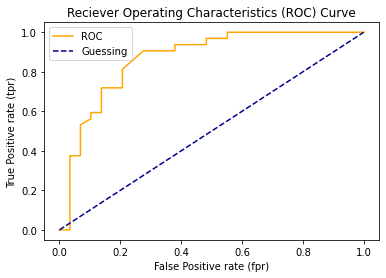

In [22]:
# Create a function for plotting ROC curve

import matplotlib.pyplot as plt

def plot_roc(fpr, tpr):
    """
    Plots a ROC curve given a False Positive(fpr) and
    True Positive rate(tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot the line with no Predictive Power(baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title("Reciever Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc(fpr,tpr)

In [23]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

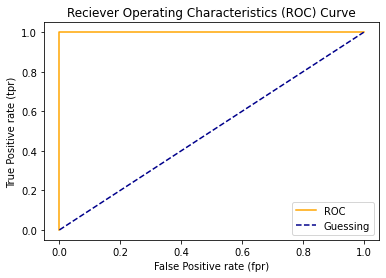

In [24]:
# Plot perfect ROC curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc(fpr,tpr)

In [25]:
# Perfect AUC Score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [26]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [27]:
# visualize Confusion Matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [28]:
21+6+7+27

61

In [29]:
len(x_test)

61

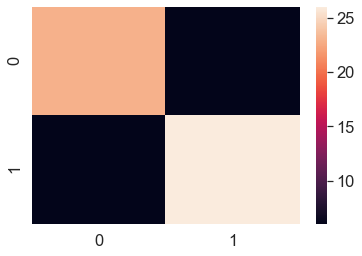

In [30]:
# Make our Confusion Matrix more visual with Seaborn's Heatmap

import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# Create a Confusion Matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

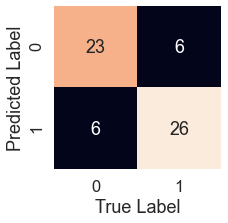

In [31]:
# Define a Function to Plot Confusion Matrix Heatmap.
def plot_conf_mat(conf_mat):
    """
    Plots a Confusion Matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, #Annotate the Boxes with conf_mat info
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label");
    
plot_conf_mat(conf_mat)

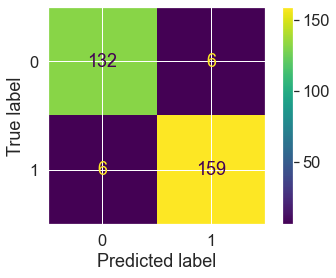

In [32]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,x,y)

**Classification Report**

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [34]:
# Where Precision and recll become valuable
disease_true = np.zeros(10000)
disease_true[0]=1 # Only one Positive Case

disease_preds = np.zeros(10000) # Model predicts every case is 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\pravi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To Summarize Classification Metrics:

* **Accuracy** is a Good measure to start with if all classes are balanced(e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **Recall** become more important when classes are imbalanced.
* If False Positive Predictions are worse than False Negative, aim for Higher Precision.
* If False Negative Predictions are worse than False Positive, aim for Higher Recall.
* **F1-Score** is a combination of Precision and Recall

### 5.2.2 Regression model Evaluation Metrics

1. R^2 (Pronounced r-squared) or Coefficient of Determination.
2. Mean Absolute Error (MAE)
3. Mean Squared Error(MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. values can range from negative infinity(a very poor model) to 1. For Example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly Predicts a range of numbers it's R^2 value would be 1.

In [35]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train);

In [36]:
model.score(x_test, y_test)

0.8654448653350507

In [37]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean

y_test_mean = np.full(len(y_test), y_test.mean())

In [38]:
y_test_mean, y_test.mean()

(array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.4

In [39]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [40]:
r2_score(y_test, y_test)

1.0

**Mean Absolute Error (MAE)**

MAE is the Average of the absolute differences between the Predicted values and the Actual values. It gives you an Idea of How wrong your models Predictions are.

In [41]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [42]:
df = pd.DataFrame(data={"Actual Data": y_test, "Predicted Data": y_preds})
df["differences"] = df["Predicted Data"] - df["Actual Data"]
df

,Actual Data,Predicted Data,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Sqaured Error (MSE)**

In [43]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [44]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared

173     0.269361
274     3.334276
491     9.979281
72      0.435600
452     0.628849
         ...    
412    22.477081
436     8.271376
411    12.873744
86      5.267025
75      5.914624
Name: differences, Length: 102, dtype: float64

In [45]:
squared.mean()

9.867437068627439

### 5.2.3 Finally Using the `scoring` Parameter

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()


In [47]:
np.random.seed(42)

cv_acc = cross_val_score(clf,x, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [48]:
# Cross-Validated Accuracy
print(f'The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is:82.48%


In [49]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
print(f'The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is:82.48%


In [50]:
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [51]:
cv_recall = cross_val_score(clf, x, y, cv = 5, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [52]:
cv_f1 = cross_val_score(clf, x, y, cv = 5, scoring = "f1")
np.mean(cv_f1)

0.841476533416832

How About our Regression Model?

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [54]:
np.random.seed(42)

cv_r2 = cross_val_score(model, x, y, cv=5, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [55]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=5, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [56]:
# Mean Absolute Error (MAE)
cv_mae = cross_val_score(model, x, y, cv = 5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [57]:
# Mean Squared Error(MSE)
cv_mse=cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.12863512415064

### 5.3 Problem Specific Metric Functions

Using Different Evaluation metrics as Scikit-Learn Functions

**Classification Evaluation Metrics**

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make some Predictions
y_preds = clf.predict(x_test)

# Evaluate the Classifier
print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1 : {f1_score(y_test, y_preds)}")


Classifier metrics on the test set
Accuracy:83.13%
Precision: 0.8079470198675497
Recall: 0.9104477611940298
F1 : 0.856140350877193


**Regression Evaluation Functions**

In [61]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

# Make some Predictions
y_preds = model.predict(x_test)

# Evaluate the Regression model
print("Regression Metrics on the test")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_preds)}")


Regression Metrics on the test
R^2: 0.8654448653350507
Mean Absolute Error: 2.136382352941176
Mean Squared Error: 9.867437068627442
